# FootballTransfers

In [2]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import copy
from warnings import filterwarnings
filterwarnings("ignore")
sns.set()
%matplotlib inline

read file

In [32]:
df = pd.read_csv('Summer22_FootballTransfers.csv')
df.head(4)


,name,position,age,origin_club,league_origin_club,country_origin_club,new_club,league_new_club,country_new_club,cost,date_of_transfer
0,Amine Gouiri,Centre-Forward,22.0,OGC Nice,Ligue 1,France,Stade Rennais FC,Ligue 1,France,€42.00m,9/1/2022
1,Umar Sadiq,Centre-Forward,25.0,UD Almería,LaLiga,Spain,Real Sociedad,LaLiga,Spain,€18.00m,9/1/2022
2,Carlos Soler,Central Midfield,25.0,Valencia CF,LaLiga,Spain,Paris Saint-Germain,Ligue 1,France,€50.00m,9/1/2022
3,Manuel Akanji,Centre-Back,27.0,Borussia Dortmund,Bundesliga,Germany,Manchester City,Premier League,England,€30.00m,9/1/2022


In [4]:
#dorp all null
df=df.dropna()
df

,name,position,age,origin_club,league_origin_club,country_origin_club,new_club,league_new_club,country_new_club,cost,date_of_transfer
0,Amine Gouiri,Centre-Forward,22.0,OGC Nice,Ligue 1,France,Stade Rennais FC,Ligue 1,France,€42.00m,9/1/2022
1,Umar Sadiq,Centre-Forward,25.0,UD Almería,LaLiga,Spain,Real Sociedad,LaLiga,Spain,€18.00m,9/1/2022
2,Carlos Soler,Central Midfield,25.0,Valencia CF,LaLiga,Spain,Paris Saint-Germain,Ligue 1,France,€50.00m,9/1/2022
3,Manuel Akanji,Centre-Back,27.0,Borussia Dortmund,Bundesliga,Germany,Manchester City,Premier League,England,€30.00m,9/1/2022
4,Wout Faes,Centre-Back,24.0,Stade Reims,Ligue 1,France,Leicester City,Premier League,England,€10.00m,9/1/2022
...,...,...,...,...,...,...,...,...,...,...,...
33619,Moses Usor,Right Winger,20.0,SK Slavia Prague B,FNL,Czech Republic,SK Slavia Prague,Fortuna Liga,Czech Republic,€100Th.,7/1/2022
33621,Ovidiu Agapie,Left Winger,17.0,Ripensia Timisoara U19,Romania,Romania,Ripensia Timisoara,Liga 2,Romania,€10Th.,7/1/2022
33622,Rares Butnarasu,Right-Back,16.0,Ripensia Timisoara U19,Romania,Romania,Ripensia Timisoara,Liga 2,Romania,€10Th.,7/1/2022
33623,Marin Petkov,attack,18.0,Cherno More Varna U19,Bulgaria,Bulgaria,Cherno More Varna II,Bulgaria,Bulgaria,€10Th.,7/1/2022


In [5]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27027 entries, 0 to 33624
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 27027 non-null  object 
 1   position             27027 non-null  object 
 2   age                  27027 non-null  float64
 3   origin_club          27027 non-null  object 
 4   league_origin_club   27027 non-null  object 
 5   country_origin_club  27027 non-null  object 
 6   new_club             27027 non-null  object 
 7   league_new_club      27027 non-null  object 
 8   country_new_club     27027 non-null  object 
 9   cost                 27027 non-null  object 
 10  date_of_transfer     27027 non-null  object 
dtypes: float64(1), object(10)
memory usage: 2.5+ MB


 replace_foreign_characters

In [6]:
#mohamed etman
import re
def replace_foreign_characters(s):
    return re.sub(r'[^\x00-\x7f]',r'', s)

In [7]:
for i in df.columns:
    
    if i=='cost' or i=='age':
        continue
    
    df[i]= df[i].apply(lambda x: replace_foreign_characters(x))

turn cost from str to float

In [8]:
df.cost = df["cost"].str.replace("€","")
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'Th' in x:
        
        if len(x) > 1:
            return float(x.replace('Th', '')) * 1000
        return 1000.0
    if 'm' in x:
       
        if len(x) > 1:
            return float(x.replace('m', '')) * 1000000
        return 1000000.0
    return 0.0

In [9]:
df['cost'] = df['cost'].apply(value_to_float)

In [10]:
# important values

position_categories=set(df['position'])
new_clubs=set(df['new_club'])
origin_clubs=set(df['origin_club'])
age_categories=set(df['age'])
league_origin_categories=set(df['league_origin_club'])
league_new_categories=set(df['league_new_club'])

print(position_categories)



{'Goalkeeper', 'Second Striker', 'Centre-Back', 'Left-Back', 'Right Midfield', 'midfield', 'Right Winger', 'attack', 'Left Winger', 'Defensive Midfield', 'Centre-Forward', 'defence', 'Left Midfield', 'Central Midfield', 'Attacking Midfield', 'Right-Back'}


In [11]:
postision_count = df.groupby(['position'])['position'].count().to_frame()
postision_count=postision_count.rename(columns={"position": "count"}).sort_values(by=["count"],ascending=False)


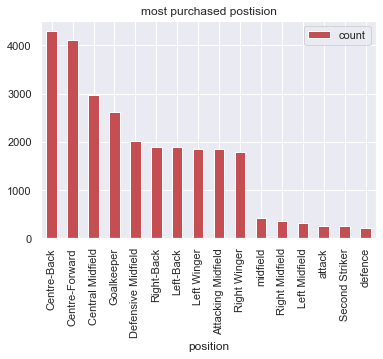

In [12]:
postision_count.plot.bar(y='count',color='r',title='most purchased postision')
plt.show()
# print(postision_count['count'])

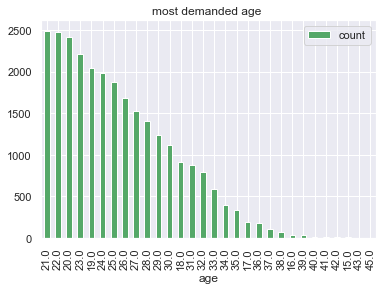

In [13]:
#The age with more players
age_count = df.groupby(['age'])['age'].count().to_frame()
age_count=age_count.rename(columns={"age": "count"}).sort_values(by=["count"],ascending=False)
age_count.plot.bar(y='count',color='g',title='most demanded age ')
plt.show()

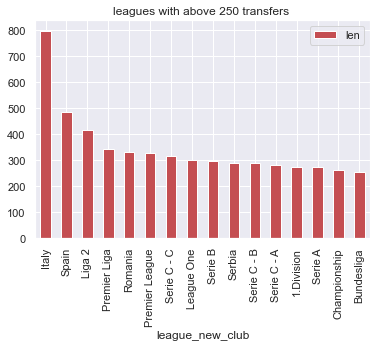

In [15]:
#nader
## only leagues with above 250 transfers
league_filter =leagues_by_len.groupby(['league_new_club']).filter(lambda x:(x.league_origin_club.len >= 250) & (x.league_origin_club.len <= 800))['name']['len'].to_frame()
league_filter=league_filter.rename(columns={"league_new_club": "len"}).sort_values(by=["len"],ascending=False)


league_filter.plot.bar(y='len',color='r',title='leagues with above 250 transfers ')
plt.show()
## also including a upper boundary to exlucde the Italy league, as this is likely a cumulation of all the Series Leagues

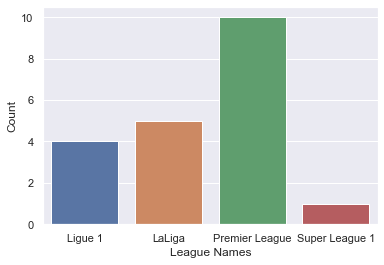

In [16]:
# Most league moved to
sns.countplot(df[:20].league_new_club)
plt.xlabel("League Names",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.show()

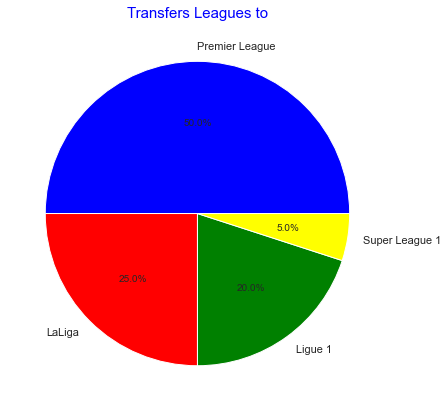

In [17]:
labels = df[:20].league_new_club.value_counts().index

colors = ["blue","red","green","yellow"]

sizes = df[:20].league_new_club.value_counts().values
explode = np.zeros(len(sizes))
plt.figure(figsize = (7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Transfers Leagues to',color = 'blue',fontsize = 15)
plt.show()

In [18]:
#Top 10 biggest player transfers
top_player=df.sort_values(by=['cost'],ascending=False).head(10)
top_player

,name,position,age,origin_club,league_origin_club,country_origin_club,new_club,league_new_club,country_new_club,cost,date_of_transfer
19252,Erling Haaland,Centre-Forward,21.0,Borussia Dortmund,Bundesliga,Germany,Manchester City,Premier League,England,150000000.0,7/1/2022
19303,Romelu Lukaku,Centre-Forward,29.0,Chelsea FC,Premier League,England,Inter Milan,Serie A,Italy,70000000.0,7/1/2022
19261,Sadio Man,Left Winger,30.0,Liverpool FC,Premier League,England,Bayern Munich,Bundesliga,Germany,70000000.0,7/1/2022
15126,Raheem Sterling,Left Winger,27.0,Manchester City,Premier League,England,Chelsea FC,Premier League,England,70000000.0,7/13/2022
12700,Matthijs de Ligt,Centre-Back,22.0,Juventus FC,Serie A,Italy,Bayern Munich,Bundesliga,Germany,70000000.0,7/19/2022
19255,Federico Chiesa,Right Winger,24.0,ACF Fiorentina,Serie A,Italy,Juventus FC,Serie A,Italy,65000000.0,7/1/2022
19250,Aurlien Tchouameni,Defensive Midfield,22.0,AS Monaco,Ligue 1,Monaco,Real Madrid,LaLiga,Spain,60000000.0,7/1/2022
9425,Jules Kound,Centre-Back,23.0,Sevilla FC,LaLiga,Spain,FC Barcelona,LaLiga,Spain,60000000.0,7/28/2022
19251,Darwin Nez,Centre-Forward,23.0,SL Benfica,Liga Portugal,Portugal,Liverpool FC,Premier League,England,55000000.0,7/1/2022
1152,Fabin Ruiz,Central Midfield,26.0,SSC Napoli,Serie A,Italy,Paris Saint-Germain,Ligue 1,France,55000000.0,8/30/2022


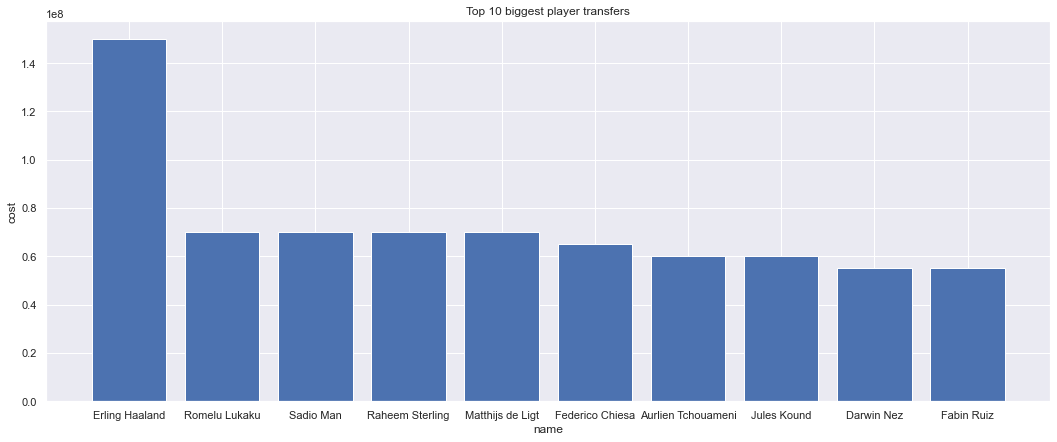

In [19]:

# Figure Size
fig = plt.figure(figsize =(18, 7))
# Horizontal Bar Plot
plt.bar( top_player['name'], top_player['cost'])

plt.xlabel("name")
plt.ylabel("cost")
plt.title("Top 10 biggest player transfers")
# Show Plot
plt.show()

In [20]:
df.groupby(['age']).cost.describe()

,count,mean,std,min,25%,50%,75%,max
age,,,,,,,,
15.0,4.0,13750.000000,7.500000e+03,10000.0,10000.0,10000.0,13750.0,25000.0
16.0,37.0,80000.000000,1.474129e+05,10000.0,10000.0,25000.0,100000.0,750000.0
17.0,192.0,136250.000000,3.767945e+05,10000.0,10000.0,50000.0,81250.0,4000000.0
18.0,912.0,251162.280702,1.026791e+06,10000.0,25000.0,50000.0,100000.0,15000000.0
19.0,2047.0,241761.113825,1.117189e+06,10000.0,25000.0,50000.0,100000.0,20000000.0
20.0,2420.0,360171.487603,1.891871e+06,10000.0,25000.0,50000.0,150000.0,40000000.0
21.0,2492.0,460603.932584,3.446187e+06,10000.0,50000.0,75000.0,200000.0,150000000.0
22.0,2472.0,604259.708738,3.114375e+06,10000.0,50000.0,100000.0,225000.0,70000000.0
23.0,2208.0,541707.427536,2.527193e+06,10000.0,50000.0,125000.0,250000.0,60000000.0


In [21]:
df.groupby(['position']).cost.describe()

,count,mean,std,min,25%,50%,75%,max
position,,,,,,,,
Attacking Midfield,1845.0,561875.338753,2.073173e+06,10000.0,50000.0,150000.0,300000.0,35000000.0
Central Midfield,2964.0,637818.825911,2.872402e+06,10000.0,50000.0,125000.0,300000.0,55000000.0
Centre-Back,4300.0,590491.860465,2.842132e+06,10000.0,50000.0,125000.0,250000.0,70000000.0
Centre-Forward,4112.0,695054.717899,3.681330e+06,10000.0,50000.0,150000.0,300000.0,150000000.0
Defensive Midfield,2005.0,622324.189526,2.855769e+06,10000.0,50000.0,125000.0,300000.0,60000000.0
Goalkeeper,2612.0,269663.093415,1.006128e+06,10000.0,25000.0,75000.0,175000.0,18000000.0
Left Midfield,316.0,310617.088608,1.492809e+06,10000.0,50000.0,100000.0,225000.0,24000000.0
Left Winger,1849.0,727639.264467,3.226609e+06,10000.0,50000.0,150000.0,325000.0,70000000.0
Left-Back,1884.0,546003.184713,2.322898e+06,10000.0,50000.0,125000.0,250000.0,40000000.0


In [22]:
#khaled
# Top10 Teams that spend the most money 
df.groupby("new_club").cost.sum().sort_values(ascending=False).head(10)

new_club
Chelsea FC             271000000.0
FC Barcelona           262000000.0
Paris Saint-Germain    251000000.0
Manchester City        246000000.0
Juventus FC            229500000.0
Nottingham Forest      220625000.0
Bayern Munich          200125000.0
Tottenham Hotspur      180000000.0
Olympique Marseille    179500000.0
Borussia Dortmund      161200000.0
Name: cost, dtype: float64

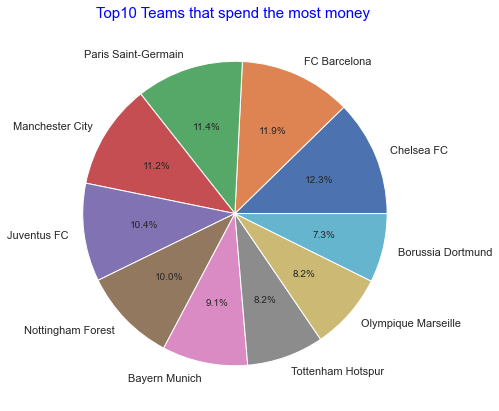

In [23]:
labels = df.groupby("new_club").cost.sum().sort_values(ascending=False).head(10).index


sizes = df.groupby("new_club").cost.sum().sort_values(ascending=False).head(10).values
explode = np.zeros(len(sizes))
plt.figure(figsize = (7,7))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%')
plt.title('Top10 Teams that spend the most money ',color = 'blue',fontsize = 15)
plt.show()

In [24]:
# Top6 league that spend the most money 
df.groupby("league_new_club").cost.sum().sort_values(ascending=False).head(6)

league_new_club
Premier League    2.381435e+09
Serie A           1.732050e+09
LaLiga            1.181000e+09
Bundesliga        1.118525e+09
Ligue 1           1.058425e+09
Sper Lig          4.598000e+08
Name: cost, dtype: float64

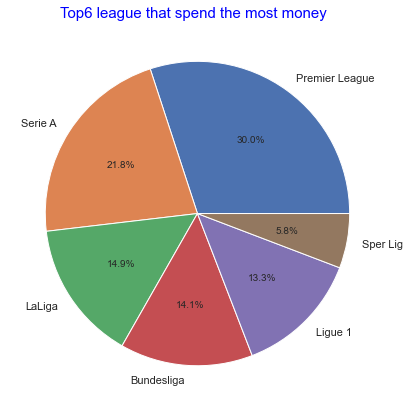

In [25]:
labels = df.groupby("league_new_club").cost.sum().sort_values(ascending=False).head(6).index


sizes = df.groupby("league_new_club").cost.sum().sort_values(ascending=False).head(6).values
explode = np.zeros(len(sizes))
plt.figure(figsize = (7,7))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%')
plt.title('Top6 league that spend the most money  ',color = 'blue',fontsize = 15)
plt.show()

<AxesSubplot:xlabel='age'>

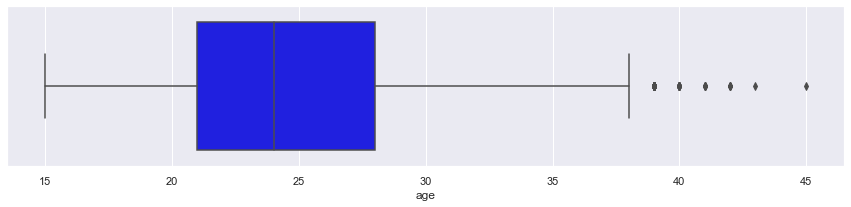

In [26]:
# Checking for the outliers
plt.figure(figsize= (15,10))
plt.subplot(3,1,1)
sns.boxplot(x= df.age, color='blue')


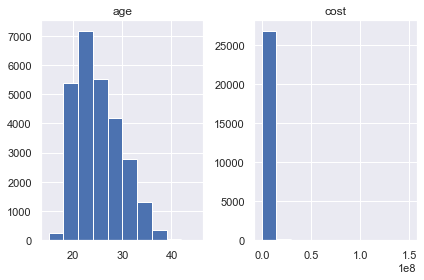

In [27]:
#soliman
# Histogram
df.hist()
plt.tight_layout()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Centre-Forward'),
  Text(1, 0, 'Central Midfield'),
  Text(2, 0, 'Centre-Back'),
  Text(3, 0, 'Defensive Midfield'),
  Text(4, 0, 'Left Winger'),
  Text(5, 0, 'Attacking Midfield'),
  Text(6, 0, 'Left-Back'),
  Text(7, 0, 'Second Striker'),
  Text(8, 0, 'Right Winger'),
  Text(9, 0, 'Goalkeeper'),
  Text(10, 0, 'defence'),
  Text(11, 0, 'Right-Back'),
  Text(12, 0, 'midfield'),
  Text(13, 0, 'Right Midfield'),
  Text(14, 0, 'Left Midfield'),
  Text(15, 0, 'attack')])

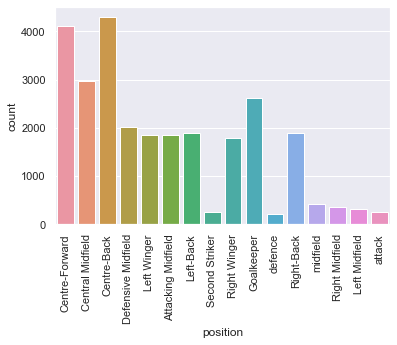

In [28]:
# num of player in every position
sns.countplot(x='position',data=df)
plt.xticks(rotation=90)

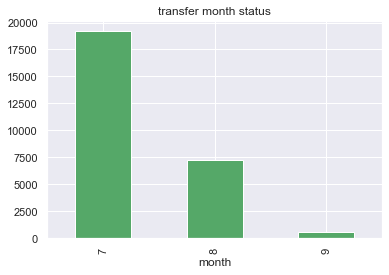

In [29]:

def get_month_transfer(df):
  for i in df.columns:
    
    if i=='date_of_transfer':
        df['month']= df[i].apply(lambda x: x[1:2] if (len(x)==10) else x[0:1] )
get_month_transfer(df)
ress=df.groupby('month').month.count()
ress.plot.bar(y='count',color='g',title='transfer month status')
plt.show()

<AxesSubplot:>

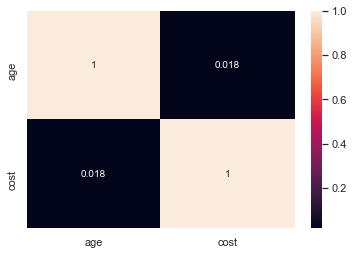

In [30]:
# Correlation Heatmap
sns.heatmap(df.corr(),annot=True)